## 1. Google Trends Analysis Setup

In [1]:
from src.utils import google_trends as gt

In [2]:
query = "war movies"

In [3]:
df = gt.query_full_interest(query)
df.head(20)

,date,value,keyword
0,2004-01-01,0.18,war movies
1,2004-02-01,0.18,war movies
2,2004-03-01,0.18,war movies
3,2004-04-01,0.19,war movies
4,2004-05-01,0.21,war movies
5,2004-06-01,0.15,war movies
6,2004-07-01,0.13,war movies
7,2004-08-01,0.13,war movies
8,2004-09-01,0.14,war movies
9,2004-10-01,0.18,war movies


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     250 non-null    datetime64[ns]
 1   value    250 non-null    float64       
 2   keyword  250 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.0+ KB


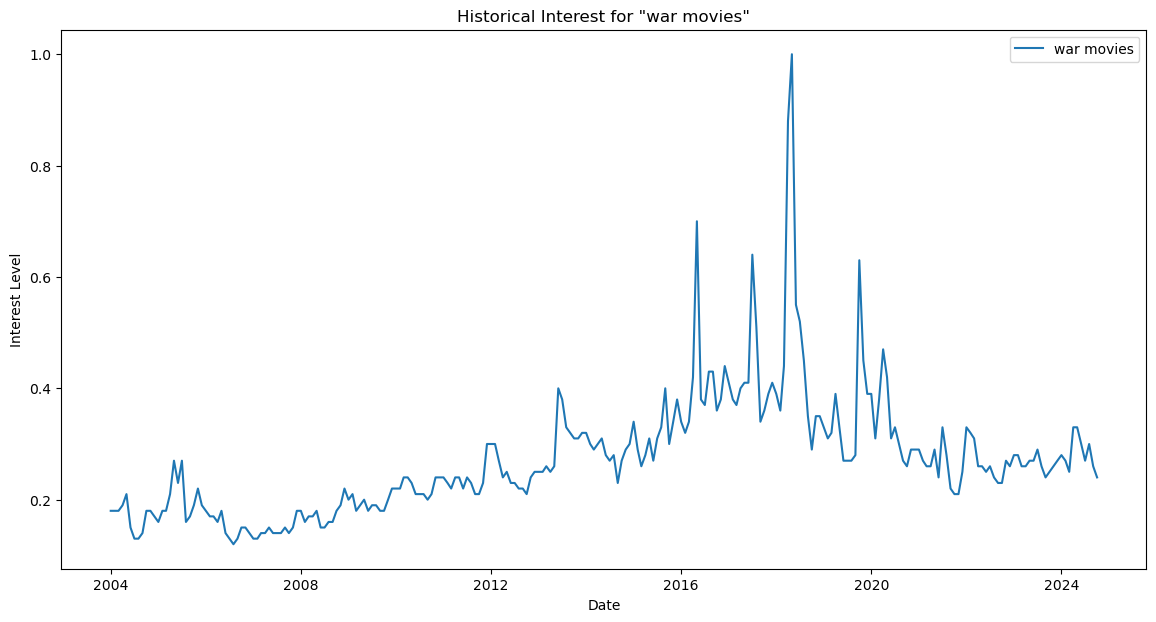

In [5]:
gt.plot_interest_time_series(df, query)

In [6]:
df_partial = gt.query_interest_around_date(query, '2021-01-01')
df_partial.head(20)

,date,value,keyword
0,2020-12-27,0.89,war movies
1,2020-12-28,0.75,war movies
2,2020-12-29,0.76,war movies
3,2020-12-30,0.69,war movies
4,2020-12-31,0.72,war movies
5,2021-01-01,1.00,war movies
6,2021-01-02,0.95,war movies
7,2021-01-03,0.99,war movies
8,2021-01-04,0.66,war movies
9,2021-01-05,0.58,war movies


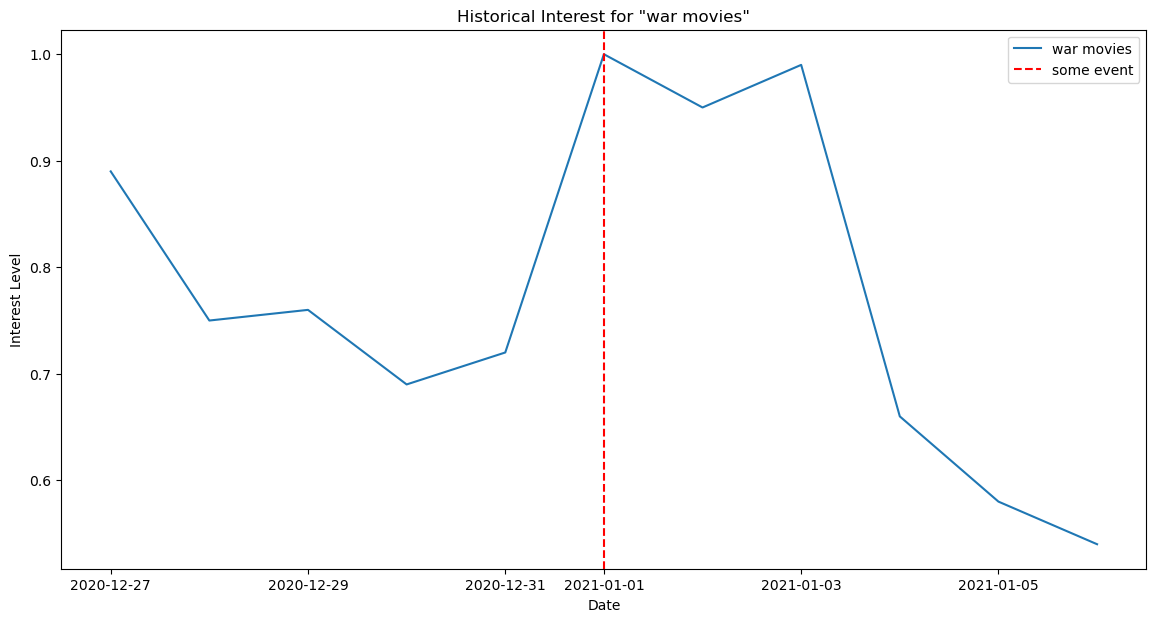

In [7]:
gt.plot_interest_time_series(df_partial, query, '2021-01-01', 'some event')

## 2. Events timeline

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_events = pd.read_csv('data/events.csv')
df_events['date'] = pd.to_datetime(df_events['date'])
df_events.head()

,date,description,event_type
0,1902-05-31,Second Boer War ends in British victory.,war
1,1903-06-11,King Alexander I of Serbia and his wife Queen ...,political instability
2,1904-02-08,A Japanese surprise attack on Port Arthur (Lus...,war
3,1905-01-22,The Revolution of 1905 in Russia erupts.,political instability
4,1905-03-31,"The First Moroccan Crisis begins, going until ...",catastrophe


In [17]:
df_events['event_type'].value_counts()

event_type
catastrophe              203
war                      200
political instability     84
natural disaster          49
pandemics                  8
Name: count, dtype: int64

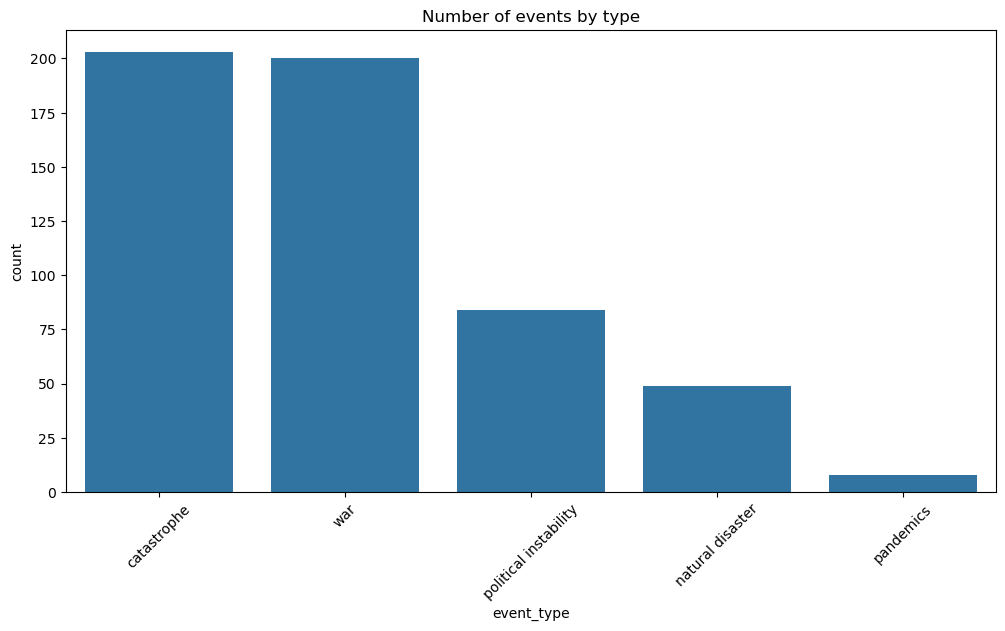

In [18]:
# Graph the number of events by type
plt.figure(figsize=(12, 6))
sns.countplot(data=df_events, x='event_type', order=df_events['event_type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of events by type')
plt.show()

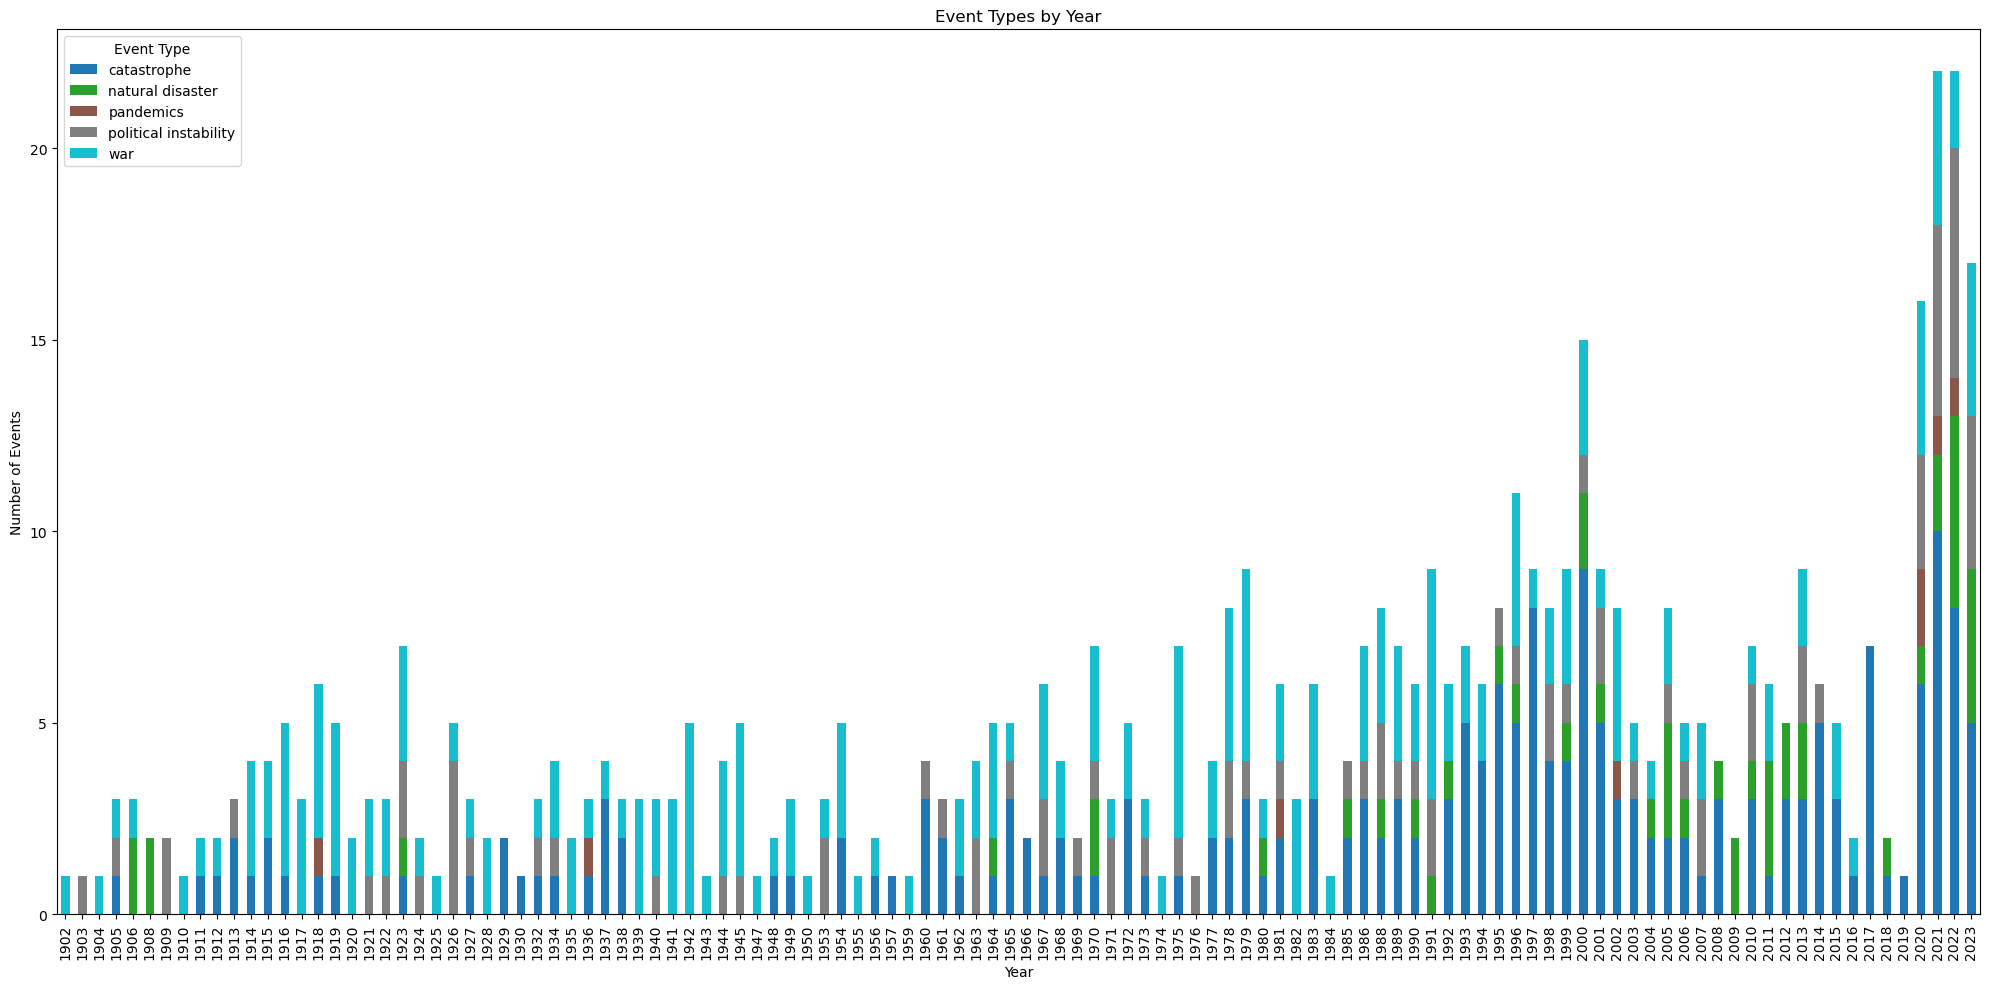

In [ ]:
# Plot the event types by year
df_year = df_events.copy()
df_year['year'] = df_year['date'].dt.year

# Group by year and event type, and count occurrences
df_grouped = df_year.groupby(['year', 'event_type']).size().reset_index(name='count')

# Pivot to get data in wide format for stacking
df_pivot = df_grouped.pivot(index='year', columns='event_type', values='count').fillna(0)

# Plot the stacked bar chart
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(20, 10), cmap='tab10')

plt.title("Event Types by Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.legend(title="Event Type")
plt.tight_layout()

## 3. Primitive Usage Example

In [22]:
# Sample some events marked as catastrophic
df_catastrophic = df_events[df_events['event_type'] == 'catastrophe']

pd.set_option('display.max_colwidth', None)
df_catastrophic.tail(30)

,date,description,event_type
466,2019-04-15,"A major fire engulfs Notre-Dame Cathedral in Paris, resulting in the roof and main spire collapsing.",catastrophe
468,2020-01-03,Qasem Soleimani is targeted and killed at Baghdad International Airport .,catastrophe
469,2020-01-08,"Ukraine International Airlines Flight 752 is shot down by Iranian Islamic Revolutionary Guards Corps (IRGC) shortly after taking off from Tehran, killing all 176 on board.",catastrophe
473,2020-08-04,"An explosion caused by unsafely stored ammonium nitrate kills at least 218 people, injures thousands, and severely damages the port of Beirut , Lebanon .",catastrophe
474,2020-09-16,"A United Nations Human Rights Council fact-finding mission formally accuses the Venezuelan government of crimes against humanity , including cases of killings, torture, violence against political opposition and disappearances since 2014.",catastrophe
478,2020-10-29,The International Organization for Migration (IOM) confirms the death of least 140 migrants who drowned off the coast of Senegal on a vessel bound for the Spanish Canary Islands .,catastrophe
482,2020-12-01,"The Arecibo Telescope of the Arecibo Observatory collapses, just weeks after the announcement of its planned demolition.",catastrophe
483,2021-01-06,"Supporters of President Donald Trump, gathered after a rally led by him, attack the United States Capitol , leading to five deaths.",catastrophe
485,2021-02-13,"Winter Storm Uri becomes the costliest winter storm in North American history, costing $200 billion and 237 lives, and triggering the 2021 Texas power crisis .",catastrophe
486,2021-02-22,"Luca Attanasio , the Italian ambassador to the Democratic Republic of the Congo , is murdered near Goma .",catastrophe


In [23]:
# Select one event
event_date = "2020-01-08"
event_name = "Ukrainian Boeing 737 Crash"
keyword = "plane crash movies"

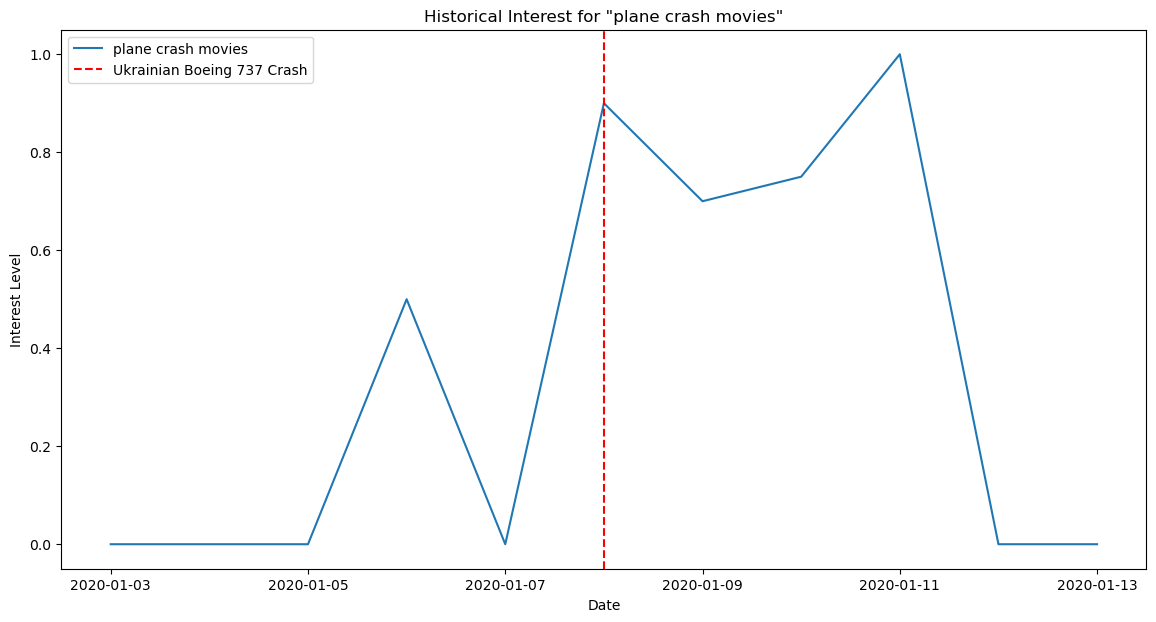

In [24]:
# Query Google Trends for interest around the event date
df_event = gt.query_interest_around_date(keyword, event_date)

# Plot the interest over time
gt.plot_interest_time_series(df_event, keyword, event_date, event_name)